# 1. Import libraries

import pandas as pd
import numpy as np
import os
import re
import string
import nltk
import torch
import torch.nn as nn
import torch.optim as optim
import seaborn as sns
from torch.utils.data import Dataset, DataLoader

nltk.download("stopwords")
from nltk.corpus import stopwords
import re

from nltk.tokenize import word_tokenize
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud
from gensim.models.fasttext import FastText
from sklearn.decomposition import PCA
import plotly.express as px
from gensim.corpora.dictionary import Dictionary
from gensim.models import LdaModel
import pyLDAvis
import pyLDAvis.gensim_models as gensimvis
from pprint import pprint
nltk.download('punkt')
from nltk.stem import PorterStemmer, SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, ImageColorGenerator
import unidecode


import warnings
warnings.filterwarnings("ignore")

%matplotlib inline
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = [5, 5]
plt.rcParams['xtick.color'] = 'black'
plt.rcParams['ytick.color'] = 'black'
plt.rcParams['text.color'] = 'black'
plt.rcParams['axes.labelcolor'] = 'black'

nltk.download('punkt')
from nltk.stem import PorterStemmer, SnowballStemmer
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import CountVectorizer
from wordcloud import WordCloud, ImageColorGenerator

from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler    
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, precision_score, recall_score
from sklearn import model_selection, naive_bayes, svm
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier

import tensorflow as tf
print('TF version', tf.__version__)

# from transformers import BertTokenizer

import ktrain
from ktrain import text

#Display every call in output
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

# 2. Read data

In [ ]:
df = pd.read_csv(os.path.join('data', 'db_responses_814_febr_2021.csv'))
df = df.drop(columns=[df.columns[1], df.columns[2], df.columns[3], df.columns[4]])
df = df.rename(columns={df.columns[0]:'incredere_sist_fiscal', df.columns[1]: 'parere_sist_fiscal'})
df.head(3)

,incredere_sist_fiscal,parere_sist_fiscal,TRANSPARENCY,VALUE FOR MONEY,ECONOMICAL,TRUST,SOCIAL WELFARE,WORK PLACE CREATION,SOCIO-ECONOMIC DEVELOPMENT,STABILITY,PREDICTIBILITY,FIN_INSP,FINES,CLEAR_LAW,FISC_FACIL,SUBV,INVEST_TAX,Q_PUBLIC_SV,TRUST.1,PUBLIC_INV,TRANSP
0,1,1,5,4,4,5,4,4,5,5,5,3,4,4,4,3,2,4,5,4,5
1,1,4,5,4,4,4,4,5,4,5,4,3,4,4,3,4,4,5,5,5,5
2,0,3,3,5,4,4,4,5,5,4,3,3,3,3,3,5,5,5,5,5,5


In [ ]:
df.shape

(814, 21)

# 3. Predict sentiment for the columns corresponding to the answers to open questions

Missing code for predicting sentiments!!!

In [ ]:
df_sent.shape

(814, 10)

Text(0.5, 1.0, 'Frequency of sentiments for nemultumiri_sist_fiscal')

Text(0.5, 0, 'Sentiment')

Text(0, 0.5, 'Frequency')

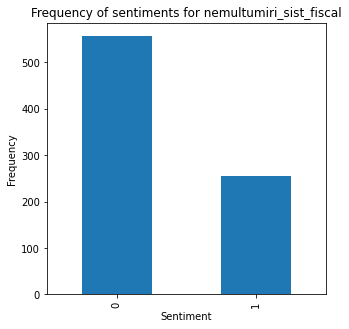

In [ ]:
fig = df_sent['nemultumiri_sist_fiscal_sentiment'].value_counts().sort_index().plot(kind='bar')
fig.set_title('Frequency of sentiments for nemultumiri_sist_fiscal')
fig.set_xlabel('Sentiment')
fig.set_ylabel('Frequency')
plt.show()

Text(0.5, 1.0, 'Frequency of sentiments for schimbari_sist_fiscal')

Text(0.5, 0, 'Sentiment')

Text(0, 0.5, 'Frequency')

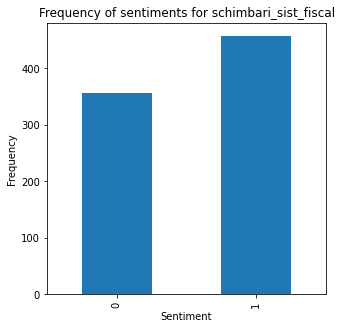

In [ ]:
fig = df_sent['schimbari_sist_fiscal_sentiment'].value_counts().sort_index().plot(kind='bar')
fig.set_title('Frequency of sentiments for schimbari_sist_fiscal')
fig.set_xlabel('Sentiment')
fig.set_ylabel('Frequency')
plt.show()

Text(0.5, 1.0, 'Frequency of sentiments for ce_ofera_sistemul')

Text(0.5, 0, 'Sentiment')

Text(0, 0.5, 'Frequency')

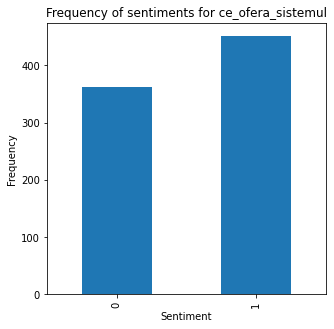

In [ ]:
fig = df_sent['ce_ofera_sistemul_sentiment'].value_counts().sort_index().plot(kind='bar')
fig.set_title('Frequency of sentiments for ce_ofera_sistemul')
fig.set_xlabel('Sentiment')
fig.set_ylabel('Frequency')
plt.show()

In [ ]:
col = df_sent.loc[:, "nemultumiri_sist_fiscal_sentiment":"ce_ofera_sistemul_sentiment"]
df_sent['overall_sentiment_all_responses'] = col.mode(axis=1)
df_sent.head()

,incredere_sist_fiscal,nemultumiri_sist_fiscal,schimbari_sist_fiscal,ce_ofera_sistemul,motivare_incredere_sist_fiscal,parere_sist_fiscal,nemultumiri_sist_fiscal_sentiment,schimbari_sist_fiscal_sentiment,ce_ofera_sistemul_sentiment,motivare_incredere_sist_fiscal_sentiment,overall_sentiment_all_responses
0,1,- injustetea sociala\n- impunerea excesiva\n- ...,as incerca sa-l orientez spre cetatean.,- crestere a nivelului de trai in mod semi-efi...,Îmi creează sentimentul că plătesc un serviciu...,Foarte slabă,0,0,0,0,0
1,1,Ineficiența utilizării sumelor de bani strânse...,Aș crea un mediu de afacere stabil.,Birocrație excesivă.,Îmi creează sentimentul că plătesc un serviciu...,Bună,0,1,1,0,1
2,0,"Organizarea probabil deficitara,\nCircuitul lu...",Din postura mea de acum imi este greu sa dau u...,"Un trai decent, servicii sociale intre mediocr...",Îmi creează sentimentul că plătesc un serviciu...,Neutră,0,0,0,1,0
3,1,Nu prea am incredere in sistem.,Nu prea stiu ce as schimba dar as face ceva in...,Nu stiu,Îmi creează sentimentul că plătesc un serviciu...,Bună,0,1,0,0,0
4,0,Fiscalitatea din Romania e plina de contradictii,Simplificarea legislatiei si a raportarilor fi...,Proceduri complicate....,Îmi creează sentimentul că plătesc un serviciu...,Foarte slabă,1,1,1,0,1


Text(0.5, 1.0, 'Frequency of sentiments for overall_sentiment_all_responses')

Text(0.5, 0, 'Sentiment')

Text(0, 0.5, 'Frequency')

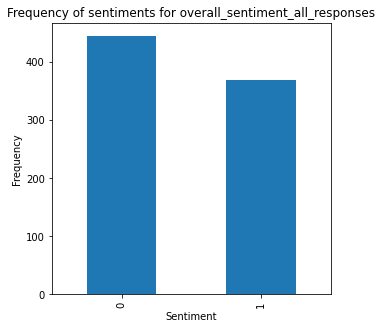

In [ ]:
fig = df_sent['overall_sentiment_all_responses'].value_counts().sort_index().plot(kind='bar')
fig.set_title('Frequency of sentiments for overall_sentiment_all_responses')
fig.set_xlabel('Sentiment')
fig.set_ylabel('Frequency')
plt.show()

In [ ]:
df_sent[['incredere_sist_fiscal', 'nemultumiri_sist_fiscal_sentiment', 'schimbari_sist_fiscal_sentiment', 'ce_ofera_sistemul_sentiment']].to_csv(os.path.join(path, 'data', 'sentiments_vs_trust.csv'))

# 5. Create the full sentiment-based dataset

In [ ]:
df_full = pd.concat([df, df_sent], axis=1)
df_full = df_full.loc[:,~df_full.columns.duplicated()]
df_full.head()

,incredere_sist_fiscal,parere_sist_fiscal,TRANSPARENCY,VALUE FOR MONEY,ECONOMICAL,TRUST,SOCIAL WELFARE,WORK PLACE CREATION,SOCIO-ECONOMIC DEVELOPMENT,STABILITY,PREDICTIBILITY,FIN_INSP,FINES,CLEAR_LAW,FISC_FACIL,SUBV,INVEST_TAX,Q_PUBLIC_SV,TRUST.1,PUBLIC_INV,TRANSP,nemultumiri_sist_fiscal,schimbari_sist_fiscal,ce_ofera_sistemul,motivare_incredere_sist_fiscal,nemultumiri_sist_fiscal_sentiment,schimbari_sist_fiscal_sentiment,ce_ofera_sistemul_sentiment,motivare_incredere_sist_fiscal_sentiment,overall_sentiment_all_responses
0,1,1,5,4,4,5,4,4,5,5,5,3,4,4,4,3,2,4,5,4,5,- injustetea sociala\n- impunerea excesiva\n- ...,as incerca sa-l orientez spre cetatean.,- crestere a nivelului de trai in mod semi-efi...,Îmi creează sentimentul că plătesc un serviciu...,0,0,0,0,0
1,1,4,5,4,4,4,4,5,4,5,4,3,4,4,3,4,4,5,5,5,5,Ineficiența utilizării sumelor de bani strânse...,Aș crea un mediu de afacere stabil.,Birocrație excesivă.,Îmi creează sentimentul că plătesc un serviciu...,0,1,1,0,1
2,0,3,3,5,4,4,4,5,5,4,3,3,3,3,3,5,5,5,5,5,5,"Organizarea probabil deficitara,\nCircuitul lu...",Din postura mea de acum imi este greu sa dau u...,"Un trai decent, servicii sociale intre mediocr...",Îmi creează sentimentul că plătesc un serviciu...,0,0,0,1,0
3,1,4,4,5,4,5,5,5,5,5,4,2,4,4,3,4,5,5,5,5,4,Nu prea am incredere in sistem.,Nu prea stiu ce as schimba dar as face ceva in...,Nu stiu,Îmi creează sentimentul că plătesc un serviciu...,0,1,0,0,0
4,0,1,5,4,4,5,4,5,5,4,3,2,3,4,3,5,5,5,4,5,5,Fiscalitatea din Romania e plina de contradictii,Simplificarea legislatiei si a raportarilor fi...,Proceduri complicate....,Îmi creează sentimentul că plătesc un serviciu...,1,1,1,0,1


In [ ]:
df_full.shape

(814, 30)

In [ ]:
# Take out values of 3 from the dataset
df_full = df_full[df_full.incredere_sist_fiscal != 3] # One outliar in the dataset
df_full = df_full.drop(columns=['TRUST.1'])
df_full.describe()

,incredere_sist_fiscal,parere_sist_fiscal,TRANSPARENCY,VALUE FOR MONEY,ECONOMICAL,TRUST,SOCIAL WELFARE,WORK PLACE CREATION,SOCIO-ECONOMIC DEVELOPMENT,STABILITY,PREDICTIBILITY,FIN_INSP,FINES,CLEAR_LAW,FISC_FACIL,SUBV,INVEST_TAX,Q_PUBLIC_SV,PUBLIC_INV,TRANSP,nemultumiri_sist_fiscal_sentiment,schimbari_sist_fiscal_sentiment,ce_ofera_sistemul_sentiment,motivare_incredere_sist_fiscal_sentiment,overall_sentiment_all_responses
count,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000,813.000000
mean,0.589176,2.927429,4.364084,4.232472,4.211562,4.619926,4.281673,4.547355,4.538745,4.634686,4.065191,3.624846,3.527675,4.156212,4.018450,4.211562,4.083641,4.510455,4.242312,4.305043,0.314883,0.563346,0.555966,0.675277,0.453875
std,0.492286,1.220069,0.772233,0.681442,0.703275,0.625364,0.777213,0.665315,0.611899,0.604276,0.790604,1.002815,1.061314,0.748694,0.881336,0.795315,0.826227,0.688721,0.752062,0.829230,0.464755,0.496276,0.497164,0.468560,0.498174
min,0.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,2.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,3.000000,3.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,3.000000,5.000000,4.000000,4.000000,5.000000,4.000000,5.000000,5.000000,5.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,4.000000,5.000000,4.000000,5.000000,0.000000,1.000000,1.000000,1.000000,0.000000
75%,1.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,4.000000,4.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,5.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [ ]:
# Create a new dataset that doesn't consist of textual data
df_fiscal_syst = df_full.drop(columns = ['nemultumiri_sist_fiscal', 'schimbari_sist_fiscal', 'ce_ofera_sistemul', 'motivare_incredere_sist_fiscal'])

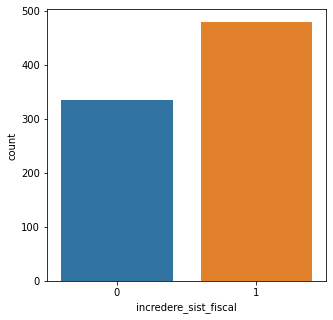

In [ ]:
sns.countplot(x = 'incredere_sist_fiscal', data=df_fiscal_syst)
# Class imbalance

In [ ]:
df_fiscal_syst[['incredere_sist_fiscal', 'parere_sist_fiscal', 'nemultumiri_sist_fiscal_sentiment', 'schimbari_sist_fiscal_sentiment', 'ce_ofera_sistemul_sentiment']].corr()

,incredere_sist_fiscal,parere_sist_fiscal,nemultumiri_sist_fiscal_sentiment,schimbari_sist_fiscal_sentiment,ce_ofera_sistemul_sentiment
incredere_sist_fiscal,1.000000,0.505963,-0.020611,-0.044574,0.224885
parere_sist_fiscal,0.505963,1.000000,-0.016119,-0.080874,0.233082
nemultumiri_sist_fiscal_sentiment,-0.020611,-0.016119,1.000000,0.207082,0.078205
schimbari_sist_fiscal_sentiment,-0.044574,-0.080874,0.207082,1.000000,0.021801
ce_ofera_sistemul_sentiment,0.224885,0.233082,0.078205,0.021801,1.000000


In [ ]:
# df_fiscal_syst.to_csv(os.path.join(path, 'data', 'Perceptia_fiscalitatii_814_febr 2021_last_with_sent.csv'), index=False)

# 6 Compare predictive models (ML vs. DL)

## 6.1. LR

In [ ]:
df_fiscal_syst.columns

Index(['incredere_sist_fiscal', 'parere_sist_fiscal', 'TRANSPARENCY',
       'VALUE FOR MONEY', 'ECONOMICAL', 'TRUST', 'SOCIAL WELFARE',
       'WORK PLACE CREATION', 'SOCIO-ECONOMIC DEVELOPMENT', 'STABILITY',
       'PREDICTIBILITY', 'FIN_INSP', 'FINES', 'CLEAR_LAW', 'FISC_FACIL',
       'SUBV', 'INVEST_TAX', 'Q_PUBLIC_SV', 'PUBLIC_INV', 'TRANSP',
       'nemultumiri_sist_fiscal_sentiment', 'schimbari_sist_fiscal_sentiment',
       'ce_ofera_sistemul_sentiment',
       'motivare_incredere_sist_fiscal_sentiment',
       'overall_sentiment_all_responses'],
      dtype='object')

In [ ]:
x = df_fiscal_syst.iloc[:, 1:-1].to_numpy()
y = df_fiscal_syst.iloc[:, 0:1].to_numpy()
x.shape
y.shape

(813, 23)

(813, 1)

In [ ]:
#defining dataset class
class dataset(Dataset):
  def __init__(self,x,y):
    self.x = torch.tensor(x,dtype=torch.float32)
    self.y = torch.tensor(y,dtype=torch.float32)
    self.length = self.x.shape[0]
 
  def __getitem__(self,idx):
    return self.x[idx],self.y[idx]
  def __len__(self):
    return self.length
trainset = dataset(x,y)
#DataLoader
trainloader = DataLoader(trainset,batch_size=64,shuffle=False)

In [ ]:
#defining the network
from torch import nn
from torch.nn import functional as F
class Net(nn.Module):
  def __init__(self,input_shape):
    super(Net,self).__init__()
    self.fc1 = nn.Linear(input_shape,4) # If simple logistic regression is enough , the layer fc2 and fc3 could be removed
    self.fc2 = nn.Linear(4,4)
    self.fc3 = nn.Linear(4,1)
  def forward(self,x):
    x = torch.relu(self.fc1(x))
    x = torch.relu(self.fc2(x))
    x = torch.sigmoid(self.fc3(x))
    return x

In [ ]:
#hyper parameters
learning_rate = 0.001
epochs = 5000
# Model , Optimizer, Loss
model = Net(input_shape=x.shape[1])
optimizer = torch.optim.SGD(model.parameters(),lr=learning_rate)
loss_fn = nn.BCELoss()

In [ ]:
# Training
#forward loop
losses = []
accur = []
for i in range(epochs):
  for j,(x_train,y_train) in enumerate(trainloader):
    
    #calculate output
    output = model(x_train)
 
    #calculate loss
    loss = loss_fn(output,y_train.reshape(-1,1))
 
    #accuracy
    predicted = model(torch.tensor(x,dtype=torch.float32))
    acc = (predicted.reshape(-1).detach().numpy().round() == y).mean()
    #backprop
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

  if i%50 == 0:
    losses.append(loss)
    accur.append(acc)
    print("epoch {}\tloss : {}\t accuracy : {}".format(i,loss,acc))

epoch 0	loss : 0.7855135798454285	 accuracy : 0.4108241082410824
epoch 50	loss : 0.6516152024269104	 accuracy : 0.5885177670964902
epoch 100	loss : 0.6423927545547485	 accuracy : 0.5889565168714418
epoch 150	loss : 0.6385771632194519	 accuracy : 0.588737141983966
epoch 200	loss : 0.634275496006012	 accuracy : 0.588737141983966
epoch 250	loss : 0.6291836500167847	 accuracy : 0.5878596424340627
epoch 300	loss : 0.622953474521637	 accuracy : 0.5876402675465869
epoch 350	loss : 0.6151964068412781	 accuracy : 0.5845690191219255
epoch 400	loss : 0.6061801314353943	 accuracy : 0.5810590209223125
epoch 450	loss : 0.597040593624115	 accuracy : 0.574697149185514
epoch 500	loss : 0.5882660746574402	 accuracy : 0.5667996532363848
epoch 550	loss : 0.5794036388397217	 accuracy : 0.5591215321747314
epoch 600	loss : 0.5694330930709839	 accuracy : 0.5542952846502635
epoch 650	loss : 0.5628288984298706	 accuracy : 0.5501271617882231
epoch 700	loss : 0.5567945837974548	 accuracy : 0.545520289151231
epoch

RuntimeError: ignored

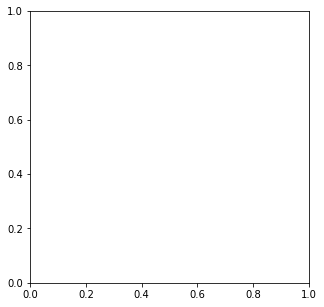

In [ ]:
#plotting the loss
plt.plot(losses)
plt.title('Loss vs Epochs')
plt.xlabel('Epochs')
plt.ylabel('loss')

In [ ]:
#printing the accuracy
plt.plot(accur)
plt.title('Accuracy vs Epochs')
plt.xlabel('Accuracy')
plt.ylabel('loss')

## 6.2. LR

In [ ]:
# Train test split
df_train, df_test = train_test_split(df_fiscal_syst, test_size=0.25, random_state=1)

# Standardize x and transform the data to torch tensors
scaler = StandardScaler()

X_train = torch.tensor(scaler.fit_transform(df_train.drop(columns=['incredere_sist_fiscal', 'motivare_incredere_sist_fiscal_sentiment']).to_numpy()), dtype=torch.float) # or df_fiscal_syst.iloc[:, 1:]
X_test = torch.tensor(scaler.fit_transform(df_test.drop(columns=['incredere_sist_fiscal', 'motivare_incredere_sist_fiscal_sentiment']).to_numpy()), dtype=torch.float)
Y_train = torch.tensor(df_train['incredere_sist_fiscal'].to_numpy(), dtype=torch.float).view(-1, 1) # or df_fiscal_syst.iloc[:, 0:1]
Y_test = torch.tensor(df_test['incredere_sist_fiscal'].to_numpy(), dtype=torch.float).view(-1, 1)

print(X_train.shape)
print(X_test.shape)
print(Y_train.shape)
print(Y_test.shape)

In [ ]:
# Get the input, hidden, and output layers' shape
input_layer_size = X_train.shape[1]
hidden_layer_size_1 = 4
hidden_layer_size_2 = 16
output_layer_size = 1

In [ ]:
# Let's initialize our models

model_1 = nn.Sequential(
    nn.Linear(input_layer_size, output_layer_size),
    nn.Sigmoid() #input trebuie sa coincida cu nr valorilor lui x
    # y este output
)

model_2 = nn.Sequential(
    nn.Linear(input_layer_size, output_layer_size),
    nn.Sigmoid()
)

model_3 = nn.Sequential(
    nn.Linear(input_layer_size, hidden_layer_size_1),
    nn.Linear(hidden_layer_size_1, hidden_layer_size_1),
    nn.Linear(hidden_layer_size_1, output_layer_size),
    nn.Sigmoid()
)

model_4 = nn.Sequential(
    nn.Linear(input_layer_size, hidden_layer_size_2),
    nn.Linear(hidden_layer_size_2, hidden_layer_size_2),
    nn.Linear(hidden_layer_size_2, output_layer_size),
    nn.Sigmoid()
)

model_5 = nn.Sequential(
    nn.Linear(input_layer_size, hidden_layer_size_1),
    nn.ReLU(),
    nn.Linear(hidden_layer_size_1, hidden_layer_size_1),
    nn.ReLU(),
    nn.Linear(hidden_layer_size_1, output_layer_size),
    nn.Sigmoid()
)

model_6 = nn.Sequential(
    nn.Linear(input_layer_size, hidden_layer_size_2),
    nn.ReLU(),
    nn.Linear(hidden_layer_size_2, hidden_layer_size_2),
    nn.ReLU(),
    nn.Linear(hidden_layer_size_2, output_layer_size), # pe ultimul strat nu se pune functie de activare!
    nn.Sigmoid()
)

# model_6 = nn.Sequential(
#     nn.Linear(input_layer_size, 64),
#     nn.BatchNorm1d(64),
#     nn.ReLU(),
#     nn.Linear(64, 64),
#     nn.BatchNorm1d(64),
#     nn.ReLU(),
#     nn.Dropout(p=0.1),
#     nn.Linear(64, output_layer_size)
# )
list_of_models = [model_1, model_2, model_3, model_4, model_5, model_6]

In [ ]:
criterion = nn.BCELoss()

In [ ]:
print(model_1)

In [ ]:
model_loss_dict = {}

for i, model in enumerate(list_of_models, start=1):
    print(f"Model {i} Training...")
    if i == 2:
        optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
    else:
        optimizer = torch.optim.Adam(model.parameters(), lr = 0.001)
    model_loss_dict[f'model_{i}_loss_train'] = []
    model_loss_dict[f'model_{i}_loss_test'] = []

    for epoch in range(1, 5000):
        optimizer.zero_grad()

        #forward pass
        Y_train_pred = model(X_train)

        #unnormalize data
        #Y_train_pred = Y_train_pred * torch.tensor(std_train, dtype=torch.float) + torch.tensor(mean_train, dtype=torch.float)
        
        #calculate and print loss
        loss_train = criterion(Y_train_pred, Y_train.reshape(-1,1))
        
        if (epoch+1) % 250 == 0: # sa nu incarcam calculele (folosim doar multiplii de 250)
            # test the model    
            with torch.no_grad(): #daca nu folosim no_grad el va face si backpropagation
                Y_test_pred = model(X_test)

            # compute test loss
            loss_test = criterion(Y_test_pred, Y_test)

            # append and print losses
            model_loss_dict[f'model_{i}_loss_train'].append(loss_train)
            model_loss_dict[f'model_{i}_loss_test'].append(loss_test)
            print(f"Epoch[{epoch:4}]: ", 
                  'Loss Train: ', f'{loss_train.item():.2f} ', 
                  'Loss Test: ', f'{loss_test.item():.2f}')

        #backward pass and update parameters
        loss_train.backward()
        optimizer.step()

    print('\n')

In [ ]:
model_loss_dict.keys()

Text(0.5, 1.0, 'Model 1')

Text(0.5, 0, 'Epoch (in 100s)')

Text(0, 0.5, 'Loss')

Text(0.5, 0.98, 'Train Loss')

Text(0.5, 1.0, 'Model 2')

Text(0.5, 0, 'Epoch (in 100s)')

Text(0, 0.5, 'Loss')

Text(0.5, 0.98, 'Train Loss')

Text(0.5, 1.0, 'Model 3')

Text(0.5, 0, 'Epoch (in 100s)')

Text(0, 0.5, 'Loss')

Text(0.5, 0.98, 'Train Loss')

Text(0.5, 1.0, 'Model 4')

Text(0.5, 0, 'Epoch (in 100s)')

Text(0, 0.5, 'Loss')

Text(0.5, 0.98, 'Train Loss')

Text(0.5, 1.0, 'Model 5')

Text(0.5, 0, 'Epoch (in 100s)')

Text(0, 0.5, 'Loss')

Text(0.5, 0.98, 'Train Loss')

Text(0.5, 1.0, 'Model 6')

Text(0.5, 0, 'Epoch (in 100s)')

Text(0, 0.5, 'Loss')

Text(0.5, 0.98, 'Train Loss')

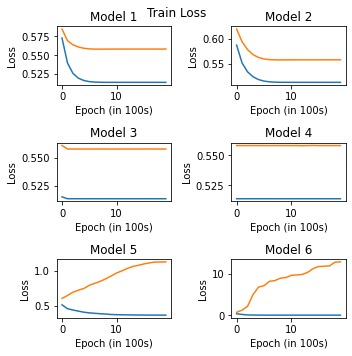

In [ ]:
for i, model in enumerate(list_of_models, start=1):
  with torch.no_grad():
    y_test_pred = model
    plt.subplot(3,2,i) 
    plt.plot(model_loss_dict[f'model_{i}_loss_train'])
    plt.plot(model_loss_dict[f'model_{i}_loss_test'])
    plt.title(f'Model {i}')
    plt.xlabel('Epoch (in 100s)')
    plt.ylabel('Loss')
    plt.tight_layout()
    plt.suptitle('Train Loss')

Text(0.5, 1.0, 'Model 1')

Text(0.5, 0, 'Target')

Text(0, 0.5, 'Prediction')

Text(0.5, 1.0, 'Model 2')

Text(0.5, 0, 'Target')

Text(0, 0.5, 'Prediction')

Text(0.5, 1.0, 'Model 3')

Text(0.5, 0, 'Target')

Text(0, 0.5, 'Prediction')

Text(0.5, 1.0, 'Model 4')

Text(0.5, 0, 'Target')

Text(0, 0.5, 'Prediction')

Text(0.5, 1.0, 'Model 5')

Text(0.5, 0, 'Target')

Text(0, 0.5, 'Prediction')

Text(0.5, 1.0, 'Model 6')

Text(0.5, 0, 'Target')

Text(0, 0.5, 'Prediction')

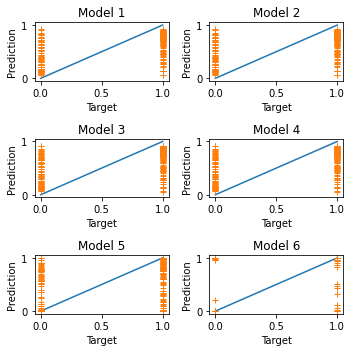

In [ ]:
for i, model in enumerate(list_of_models, start=1):
  with torch.no_grad():
    Y_test_pred = model(X_test)
  plt.subplot(3,2,i)
  plt.plot(Y_test, Y_test)
  plt.plot(Y_test, Y_test_pred, '+')
  plt.title(f'Model {i}')
  plt.xlabel('Target')
  plt.ylabel('Prediction')
  plt.tight_layout()

## 6.3. LR

In [ ]:
# Create input and output variables
X = df_fiscal_syst.iloc[:, 1:]
y = df_fiscal_syst.iloc[:, 0:1]
# Train test split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)
# Standardize x
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [ ]:
EPOCHS = 50
BATCH_SIZE = 64
LEARNING_RATE = 0.001

In [ ]:
## train data
class trainData(Dataset):
    
  def __init__(self, X_data, y_data):
    self.X_data = X_data
    self.y_data = y_data
      
  def __getitem__(self, index):
    return self.X_data[index], self.y_data[index]
      
  def __len__ (self):
    return len(self.X_data)

In [ ]:
y_train = torch.Tensor(y_train.values)

In [ ]:
y_train.shape

torch.Size([609, 1])

In [ ]:
X_train.shape

(609, 23)

In [ ]:
train_data = trainData(torch.FloatTensor(X_train), torch.FloatTensor(y_train))
## test data    
class testData(Dataset):

  def __init__(self, X_data):
      self.X_data = X_data
      
  def __getitem__(self, index):
      return self.X_data[index]
      
  def __len__ (self):
      return len(self.X_data)
    

test_data = testData(torch.FloatTensor(X_test))

In [ ]:
train_loader = DataLoader(dataset=train_data, batch_size=BATCH_SIZE, shuffle=True)
test_loader = DataLoader(dataset=test_data, batch_size=1)

In [ ]:
class binaryClassification(nn.Module):
  def __init__(self):
    super(binaryClassification, self).__init__()
    self.layer_1 = nn.Linear(input_layer_size, 64) 
    self.layer_2 = nn.Linear(64, 64)
    self.layer_out = nn.Linear(64, output_layer_size) 
    
    self.relu = nn.ReLU()
    self.dropout = nn.Dropout(p=0.1)
    self.batchnorm1 = nn.BatchNorm1d(64)
    self.batchnorm2 = nn.BatchNorm1d(64)
      
  def forward(self, inputs):
    x = self.relu(self.layer_1(inputs))
    x = self.batchnorm1(x)
    x = self.relu(self.layer_2(x))
    x = self.batchnorm2(x)
    x = self.dropout(x)
    x = self.layer_out(x)
        
    return x

In [ ]:
device = torch.device("cuda:0" if torch.cuda.is_available() else "cpu")
print(device)

cpu


In [ ]:
model = binaryClassification()
model.to(device)
print(model)
criterion = nn.BCEWithLogitsLoss()
optimizer = optim.Adam(model.parameters(), lr=LEARNING_RATE)

binaryClassification(
  (layer_1): Linear(in_features=22, out_features=64, bias=True)
  (layer_2): Linear(in_features=64, out_features=64, bias=True)
  (layer_out): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
  (batchnorm1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

binaryClassification(
  (layer_1): Linear(in_features=22, out_features=64, bias=True)
  (layer_2): Linear(in_features=64, out_features=64, bias=True)
  (layer_out): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
  (batchnorm1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)


In [ ]:
def binary_acc(y_pred, y_test):
  y_pred_tag = torch.round(torch.sigmoid(y_pred))

  correct_results_sum = (y_pred_tag == y_test).sum().float()
  acc = correct_results_sum/y_test.shape[0]
  acc = torch.round(acc * 100)
  
  return acc

In [ ]:
model.train()
for e in range(1, EPOCHS+1):
  epoch_loss = 0
  epoch_acc = 0
  for X_batch, y_batch in train_loader:
    X_batch, y_batch = X_batch.to(device), y_batch.to(device)
    optimizer.zero_grad()
    
    y_pred = model(X_batch)

    loss = criterion(y_pred, y_batch)
    acc = binary_acc(y_pred, y_batch)
    
    loss.backward()
    optimizer.step()
    
    epoch_loss += loss.item()
    epoch_acc += acc.item()

  print(f'Epoch {e+0:03}: | Loss: {epoch_loss/len(train_loader):.5f} | Acc: {epoch_acc/len(train_loader):.3f}')

binaryClassification(
  (layer_1): Linear(in_features=22, out_features=64, bias=True)
  (layer_2): Linear(in_features=64, out_features=64, bias=True)
  (layer_out): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
  (batchnorm1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

RuntimeError: ignored

In [ ]:
y_pred_list = []
model.eval()
with torch.no_grad():
  for X_batch in test_loader:
    X_batch = X_batch.to(device)
    y_test_pred = model(X_batch)
    y_test_pred = torch.sigmoid(y_test_pred)
    y_pred_tag = torch.round(y_test_pred)
    y_pred_list.append(y_pred_tag.cpu().numpy())

y_pred_list = [a.squeeze().tolist() for a in y_pred_list]

binaryClassification(
  (layer_1): Linear(in_features=23, out_features=64, bias=True)
  (layer_2): Linear(in_features=64, out_features=64, bias=True)
  (layer_out): Linear(in_features=64, out_features=1, bias=True)
  (relu): ReLU()
  (dropout): Dropout(p=0.1, inplace=False)
  (batchnorm1): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (batchnorm2): BatchNorm1d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
)

In [ ]:
confusion_matrix(y_test, y_pred_list)

array([[54, 22],
       [29, 99]])

In [ ]:
print(classification_report(y_test, y_pred_list)) #Overfitting

              precision    recall  f1-score   support

           0       0.65      0.71      0.68        76
           1       0.82      0.77      0.80       128

    accuracy                           0.75       204
   macro avg       0.73      0.74      0.74       204
weighted avg       0.76      0.75      0.75       204



## 6.4. Simple ML classifiers comparison

In [ ]:
df_fiscal_syst.columns

Index(['incredere_sist_fiscal', 'parere_sist_fiscal', 'TRANSPARENCY',
       'VALUE FOR MONEY', 'ECONOMICAL', 'TRUST', 'SOCIAL WELFARE',
       'WORK PLACE CREATION', 'SOCIO-ECONOMIC DEVELOPMENT', 'STABILITY',
       'PREDICTIBILITY', 'FIN_INSP', 'FINES', 'CLEAR_LAW', 'FISC_FACIL',
       'SUBV', 'INVEST_TAX', 'Q_PUBLIC_SV', 'PUBLIC_INV', 'TRANSP',
       'nemultumiri_sist_fiscal_sentiment', 'schimbari_sist_fiscal_sentiment',
       'ce_ofera_sistemul_sentiment',
       'motivare_incredere_sist_fiscal_sentiment',
       'overall_sentiment_all_responses'],
      dtype='object')

-------------------Showing results for Without attitude
<built-in method capitalize of str object at 0x7ff565a58ab0>


BernoulliNB()

([<matplotlib.axis.XTick at 0x7ff565a58fd0>,
 [Text(0, 0, '0'), Text(0, 0, '1')])

([<matplotlib.axis.YTick at 0x7ff56455c650>,
 [Text(0, 0, '0'), Text(0, 0, '1')])

Text(0.5, 1.1, 'Confusion matrix')

Text(24.0, 0.5, 'Actual label')

Text(0.5, 320.8, 'Predicted label')

Accuracy: 0.550185873605948
Precision: 0.550185873605948
Recall: 1.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       121
           1       0.55      1.00      0.71       148

    accuracy                           0.55       269
   macro avg       0.28      0.50      0.35       269
weighted avg       0.30      0.55      0.39       269

<built-in method capitalize of str object at 0x7ff61650fd30>


DecisionTreeClassifier()

([<matplotlib.axis.XTick at 0x7ff561c84150>,
 [Text(0, 0, '0'), Text(0, 0, '1')])

([<matplotlib.axis.YTick at 0x7ff561c9df50>,
 [Text(0, 0, '0'), Text(0, 0, '1')])

Text(0.5, 1.1, 'Confusion matrix')

Text(24.0, 0.5, 'Actual label')

Text(0.5, 320.8, 'Predicted label')

Accuracy: 0.5464684014869888
Precision: 0.5792682926829268
Recall: 0.6418918918918919
              precision    recall  f1-score   support

           0       0.50      0.43      0.46       121
           1       0.58      0.64      0.61       148

    accuracy                           0.55       269
   macro avg       0.54      0.54      0.53       269
weighted avg       0.54      0.55      0.54       269

<built-in method capitalize of str object at 0x7ff614043490>


LogisticRegression()

([<matplotlib.axis.XTick at 0x7ff561bdd690>,
 [Text(0, 0, '0'), Text(0, 0, '1')])

([<matplotlib.axis.YTick at 0x7ff561b61690>,
 [Text(0, 0, '0'), Text(0, 0, '1')])

Text(0.5, 1.1, 'Confusion matrix')

Text(24.0, 0.5, 'Actual label')

Text(0.5, 320.8, 'Predicted label')

Accuracy: 0.5724907063197026
Precision: 0.5739910313901345
Recall: 0.8648648648648649
              precision    recall  f1-score   support

           0       0.57      0.21      0.31       121
           1       0.57      0.86      0.69       148

    accuracy                           0.57       269
   macro avg       0.57      0.54      0.50       269
weighted avg       0.57      0.57      0.52       269

<built-in method capitalize of str object at 0x7ff61650feb0>


RandomForestClassifier(max_depth=5, random_state=42)

([<matplotlib.axis.XTick at 0x7ff561b0e310>,
 [Text(0, 0, '0'), Text(0, 0, '1')])

([<matplotlib.axis.YTick at 0x7ff561b11350>,
 [Text(0, 0, '0'), Text(0, 0, '1')])

Text(0.5, 1.1, 'Confusion matrix')

Text(24.0, 0.5, 'Actual label')

Text(0.5, 320.8, 'Predicted label')

Accuracy: 0.5724907063197026
Precision: 0.5662650602409639
Recall: 0.9527027027027027
              precision    recall  f1-score   support

           0       0.65      0.11      0.18       121
           1       0.57      0.95      0.71       148

    accuracy                           0.57       269
   macro avg       0.61      0.53      0.45       269
weighted avg       0.60      0.57      0.47       269

<built-in method capitalize of str object at 0x7ff576aa5e90>


SVC(gamma='auto')

([<matplotlib.axis.XTick at 0x7ff561a91dd0>,
 [Text(0, 0, '0'), Text(0, 0, '1')])

([<matplotlib.axis.YTick at 0x7ff561a28b90>,
 [Text(0, 0, '0'), Text(0, 0, '1')])

Text(0.5, 1.1, 'Confusion matrix')

Text(24.0, 0.5, 'Actual label')

Text(0.5, 320.8, 'Predicted label')

Accuracy: 0.5799256505576208
Precision: 0.5708502024291497
Recall: 0.9527027027027027
              precision    recall  f1-score   support

           0       0.68      0.12      0.21       121
           1       0.57      0.95      0.71       148

    accuracy                           0.58       269
   macro avg       0.63      0.54      0.46       269
weighted avg       0.62      0.58      0.49       269

-------------------Showing results for With attitude
<built-in method capitalize of str object at 0x7ff565a58ab0>


BernoulliNB()

([<matplotlib.axis.XTick at 0x7ff561c941d0>,
 [Text(0, 0, '0'), Text(0, 0, '1')])

([<matplotlib.axis.YTick at 0x7ff561c4fb50>,
 [Text(0, 0, '0'), Text(0, 0, '1')])

Text(0.5, 1.1, 'Confusion matrix')

Text(24.0, 0.5, 'Actual label')

Text(0.5, 320.8, 'Predicted label')

Accuracy: 0.550185873605948
Precision: 0.550185873605948
Recall: 1.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       121
           1       0.55      1.00      0.71       148

    accuracy                           0.55       269
   macro avg       0.28      0.50      0.35       269
weighted avg       0.30      0.55      0.39       269

<built-in method capitalize of str object at 0x7ff61650fd30>


DecisionTreeClassifier()

([<matplotlib.axis.XTick at 0x7ff561943c90>,
 [Text(0, 0, '0'), Text(0, 0, '1')])

([<matplotlib.axis.YTick at 0x7ff561947cd0>,
 [Text(0, 0, '0'), Text(0, 0, '1')])

Text(0.5, 1.1, 'Confusion matrix')

Text(24.0, 0.5, 'Actual label')

Text(0.5, 320.8, 'Predicted label')

Accuracy: 0.6171003717472119
Precision: 0.6573426573426573
Recall: 0.6351351351351351
              precision    recall  f1-score   support

           0       0.57      0.60      0.58       121
           1       0.66      0.64      0.65       148

    accuracy                           0.62       269
   macro avg       0.61      0.62      0.61       269
weighted avg       0.62      0.62      0.62       269

<built-in method capitalize of str object at 0x7ff614043490>


LogisticRegression()

([<matplotlib.axis.XTick at 0x7ff561875610>,
 [Text(0, 0, '0'), Text(0, 0, '1')])

([<matplotlib.axis.YTick at 0x7ff561863190>,
 [Text(0, 0, '0'), Text(0, 0, '1')])

Text(0.5, 1.1, 'Confusion matrix')

Text(24.0, 0.5, 'Actual label')

Text(0.5, 320.8, 'Predicted label')

Accuracy: 0.724907063197026
Precision: 0.725609756097561
Recall: 0.8040540540540541
              precision    recall  f1-score   support

           0       0.72      0.63      0.67       121
           1       0.73      0.80      0.76       148

    accuracy                           0.72       269
   macro avg       0.72      0.72      0.72       269
weighted avg       0.72      0.72      0.72       269

<built-in method capitalize of str object at 0x7ff61650feb0>


RandomForestClassifier(max_depth=5, random_state=42)

([<matplotlib.axis.XTick at 0x7ff5617ac110>,
 [Text(0, 0, '0'), Text(0, 0, '1')])

([<matplotlib.axis.YTick at 0x7ff5617ace10>,
 [Text(0, 0, '0'), Text(0, 0, '1')])

Text(0.5, 1.1, 'Confusion matrix')

Text(24.0, 0.5, 'Actual label')

Text(0.5, 320.8, 'Predicted label')

Accuracy: 0.7360594795539034
Precision: 0.712707182320442
Recall: 0.8716216216216216
              precision    recall  f1-score   support

           0       0.78      0.57      0.66       121
           1       0.71      0.87      0.78       148

    accuracy                           0.74       269
   macro avg       0.75      0.72      0.72       269
weighted avg       0.74      0.74      0.73       269

<built-in method capitalize of str object at 0x7ff576aa5e90>


SVC(gamma='auto')

([<matplotlib.axis.XTick at 0x7ff56174f810>,
 [Text(0, 0, '0'), Text(0, 0, '1')])

([<matplotlib.axis.YTick at 0x7ff561747290>,
 [Text(0, 0, '0'), Text(0, 0, '1')])

Text(0.5, 1.1, 'Confusion matrix')

Text(24.0, 0.5, 'Actual label')

Text(0.5, 320.8, 'Predicted label')

Accuracy: 0.7472118959107806
Precision: 0.7222222222222222
Recall: 0.8783783783783784
              precision    recall  f1-score   support

           0       0.80      0.59      0.68       121
           1       0.72      0.88      0.79       148

    accuracy                           0.75       269
   macro avg       0.76      0.73      0.73       269
weighted avg       0.76      0.75      0.74       269



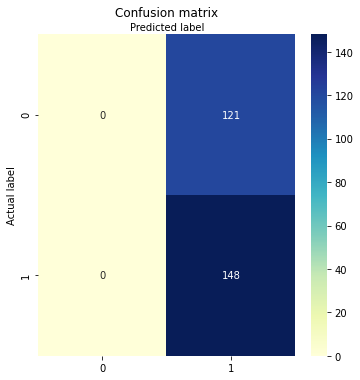

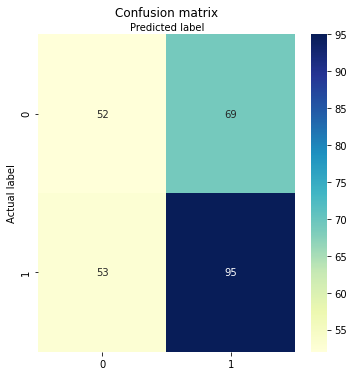

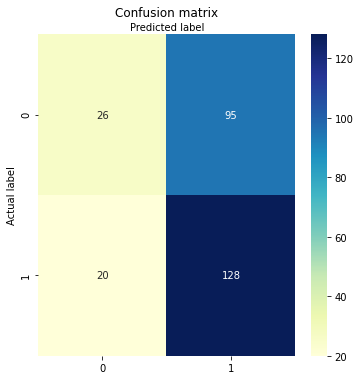

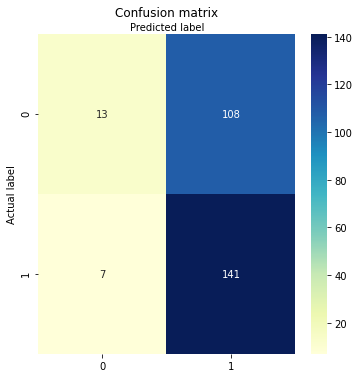

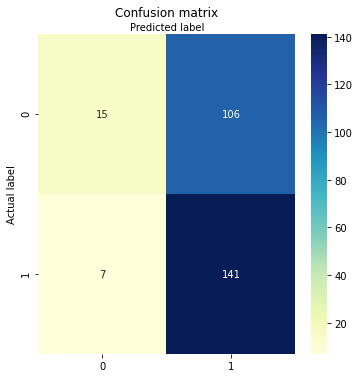

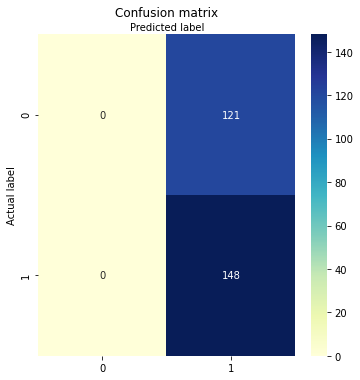

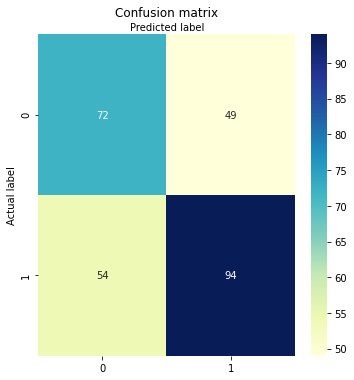

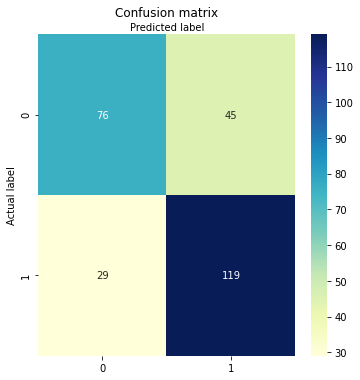

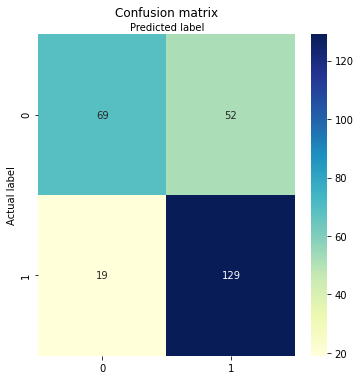

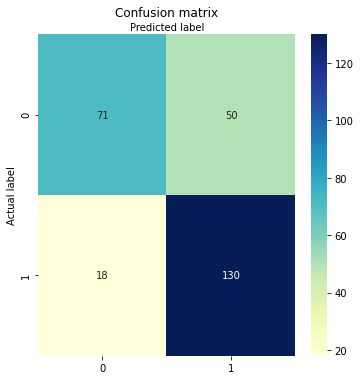

In [ ]:
results = []
nb_model = naive_bayes.BernoulliNB()
dt_model = DecisionTreeClassifier()
lr_model = LogisticRegression()
rf_model = RandomForestClassifier(max_depth=5, random_state=42)
svc_model = svm.SVC(C=1.0, kernel='rbf', degree=3, gamma='auto', probability=False)

models_dict = {'Naive Bayes': nb_model, 'Decision Tree': dt_model, 
                  'Logistic Regression': lr_model, 'Random Forest': rf_model, 
                  'Support Vector Machine': svc_model}

x_dict = {'Without attitude': df_fiscal_syst.iloc[:, 2:-5].to_numpy(), 
          'With attitude': df_fiscal_syst[['parere_sist_fiscal', 'TRANSPARENCY',
       'VALUE FOR MONEY', 'ECONOMICAL', 'TRUST', 'SOCIAL WELFARE',
       'WORK PLACE CREATION', 'SOCIO-ECONOMIC DEVELOPMENT', 'STABILITY',
       'PREDICTIBILITY', 'FIN_INSP', 'FINES', 'CLEAR_LAW', 'FISC_FACIL',
       'SUBV', 'INVEST_TAX', 'Q_PUBLIC_SV', 'PUBLIC_INV', 'TRANSP',
       'overall_sentiment_all_responses']].to_numpy()}
for case_x, x in x_dict.items():
  print('-------------------Showing results for', case_x)
  y = df_fiscal_syst.iloc[:, 0:1].to_numpy()
  X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=0)
  for model_name, model_class in models_dict.items():
    print(model_name.capitalize)
    model_class.fit(X_train,y_train)
    y_pred=model_class.predict(X_test)
    results.append([case_x, model_name, accuracy_score(y_test, y_pred), 
                    precision_score(y_test, y_pred),
                    recall_score(y_test, y_pred)])

    # Plot confusion matrix
    cnf_matrix = confusion_matrix(y_test, y_pred)
    class_names=[0,1] # name  of classes
    fig, ax = plt.subplots()
    tick_marks = np.arange(len(class_names))
    plt.xticks(tick_marks, class_names)
    plt.yticks(tick_marks, class_names)
    # create heatmap
    sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
    ax.xaxis.set_label_position("top")
    plt.tight_layout()
    plt.title('Confusion matrix', y=1.1)
    plt.ylabel('Actual label')
    plt.xlabel('Predicted label')

    print("Accuracy:",accuracy_score(y_test, y_pred))
    print("Precision:",precision_score(y_test, y_pred))
    print("Recall:",recall_score(y_test, y_pred))
    print(classification_report(y_test, y_pred)) # Metrics with sentiment

In [ ]:
results_df = pd.DataFrame(results, columns=['case', 'model', 'accuracy', 'precision', 'recall'])
results_df

,case,model,accuracy,precision,recall
0,Without sentiment,Naive Bayes,0.544118,0.544118,1.000000
1,Without sentiment,Decision Tree,0.602941,0.633929,0.639640
2,Without sentiment,Logistic Regression,0.725490,0.713178,0.828829
3,Without sentiment,Random Forest,0.740196,0.713235,0.873874
4,Without sentiment,Support Vector Machine,0.745098,0.712230,0.891892
5,With sentiment,Naive Bayes,0.622549,0.601190,0.909910
6,With sentiment,Decision Tree,0.637255,0.658120,0.693694
7,With sentiment,Logistic Regression,0.740196,0.733871,0.819820
8,With sentiment,Random Forest,0.725490,0.697842,0.873874
9,With sentiment,Support Vector Machine,0.750000,0.720588,0.882883


-------------------Showing results for using only sentiment
<built-in method capitalize of str object at 0x7f6b390811b0>


BernoulliNB()

([<matplotlib.axis.XTick at 0x7f6b38fadb10>,
 [Text(0, 0, '0'), Text(0, 0, '1')])

([<matplotlib.axis.YTick at 0x7f6b38fc8c10>,
 [Text(0, 0, '0'), Text(0, 0, '1')])

Text(0.5, 1.1, 'Confusion matrix')

Text(24.0, 0.5, 'Actual label')

Text(0.5, 320.8, 'Predicted label')

Accuracy: 0.550185873605948
Precision: 0.550185873605948
Recall: 1.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       121
           1       0.55      1.00      0.71       148

    accuracy                           0.55       269
   macro avg       0.28      0.50      0.35       269
weighted avg       0.30      0.55      0.39       269

<built-in method capitalize of str object at 0x7f6b39081b70>


DecisionTreeClassifier()

([<matplotlib.axis.XTick at 0x7f6b38f43c10>,
 [Text(0, 0, '0'), Text(0, 0, '1')])

([<matplotlib.axis.YTick at 0x7f6b366f5c10>,
 [Text(0, 0, '0'), Text(0, 0, '1')])

Text(0.5, 1.1, 'Confusion matrix')

Text(24.0, 0.5, 'Actual label')

Text(0.5, 320.8, 'Predicted label')

Accuracy: 0.550185873605948
Precision: 0.550185873605948
Recall: 1.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       121
           1       0.55      1.00      0.71       148

    accuracy                           0.55       269
   macro avg       0.28      0.50      0.35       269
weighted avg       0.30      0.55      0.39       269

<built-in method capitalize of str object at 0x7f6b3901ce90>


LogisticRegression()

([<matplotlib.axis.XTick at 0x7f6b36627890>,
 [Text(0, 0, '0'), Text(0, 0, '1')])

([<matplotlib.axis.YTick at 0x7f6b36629950>,
 [Text(0, 0, '0'), Text(0, 0, '1')])

Text(0.5, 1.1, 'Confusion matrix')

Text(24.0, 0.5, 'Actual label')

Text(0.5, 320.8, 'Predicted label')

Accuracy: 0.550185873605948
Precision: 0.550185873605948
Recall: 1.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       121
           1       0.55      1.00      0.71       148

    accuracy                           0.55       269
   macro avg       0.28      0.50      0.35       269
weighted avg       0.30      0.55      0.39       269

<built-in method capitalize of str object at 0x7f6b390810f0>


RandomForestClassifier(max_depth=5, random_state=42)

([<matplotlib.axis.XTick at 0x7f6b3655ffd0>,
 [Text(0, 0, '0'), Text(0, 0, '1')])

([<matplotlib.axis.YTick at 0x7f6b3664da10>,
 [Text(0, 0, '0'), Text(0, 0, '1')])

Text(0.5, 1.1, 'Confusion matrix')

Text(24.0, 0.5, 'Actual label')

Text(0.5, 320.8, 'Predicted label')

Accuracy: 0.550185873605948
Precision: 0.550185873605948
Recall: 1.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       121
           1       0.55      1.00      0.71       148

    accuracy                           0.55       269
   macro avg       0.28      0.50      0.35       269
weighted avg       0.30      0.55      0.39       269

<built-in method capitalize of str object at 0x7f6b38f9fe40>


SVC(gamma='auto')

([<matplotlib.axis.XTick at 0x7f6b3d5ec350>,
 [Text(0, 0, '0'), Text(0, 0, '1')])

([<matplotlib.axis.YTick at 0x7f6b3d78ae10>,
 [Text(0, 0, '0'), Text(0, 0, '1')])

Text(0.5, 1.1, 'Confusion matrix')

Text(24.0, 0.5, 'Actual label')

Text(0.5, 320.8, 'Predicted label')

Accuracy: 0.550185873605948
Precision: 0.550185873605948
Recall: 1.0
              precision    recall  f1-score   support

           0       0.00      0.00      0.00       121
           1       0.55      1.00      0.71       148

    accuracy                           0.55       269
   macro avg       0.28      0.50      0.35       269
weighted avg       0.30      0.55      0.39       269



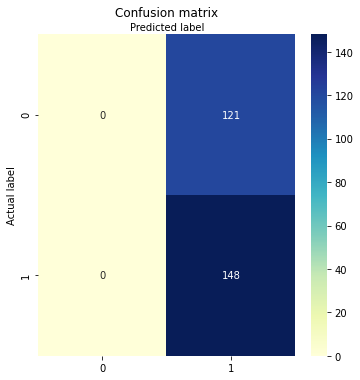

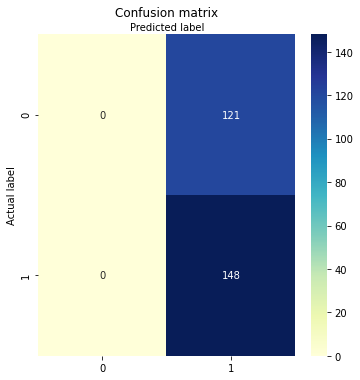

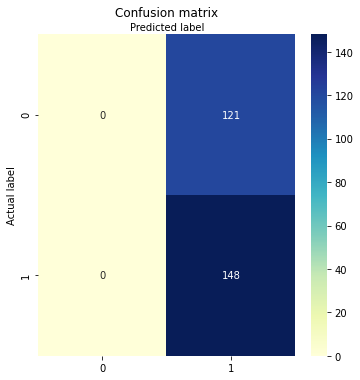

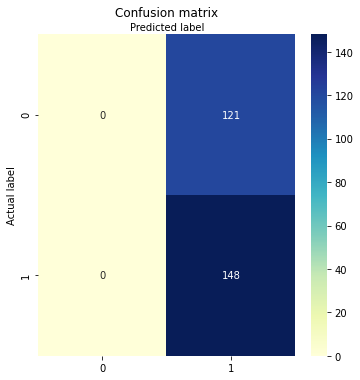

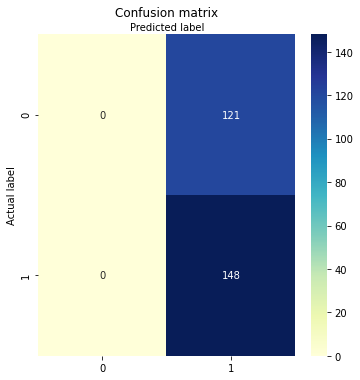

In [ ]:
results = []
nb_model = naive_bayes.BernoulliNB()
dt_model = DecisionTreeClassifier()
lr_model = LogisticRegression()
rf_model = RandomForestClassifier(max_depth=5, random_state=42)
svc_model = svm.SVC(C=1.0, kernel='rbf', degree=3, gamma='auto', probability=False)

models_dict = {'Naive Bayes': nb_model, 'Decision Tree': dt_model, 
                  'Logistic Regression': lr_model, 'Random Forest': rf_model, 
                  'Support Vector Machine': svc_model}

# x_dict = {'Without sentiment': df_fiscal_syst.iloc[:, 1:-3].to_numpy(), 
#           'With sentiment': df_fiscal_syst.iloc[:, 1:].to_numpy()}
# for case_x, x in x_dict.items():
case_x = 'using only sentiment'
print('-------------------Showing results for', case_x)
y = df_fiscal_syst.iloc[:, 0:1].to_numpy()
x = df_fiscal_syst.iloc[:, -1:]
X_train,X_test,y_train,y_test=train_test_split(x,y,test_size=0.33,random_state=0)
for model_name, model_class in models_dict.items():
  print(model_name.capitalize)
  model_class.fit(X_train,y_train)
  y_pred=model_class.predict(X_test)
  results.append([case_x, model_name, accuracy_score(y_test, y_pred), 
                  precision_score(y_test, y_pred),
                  recall_score(y_test, y_pred)])

  # Plot confusion matrix
  cnf_matrix = confusion_matrix(y_test, y_pred)
  class_names=[0,1] # name  of classes
  fig, ax = plt.subplots()
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names)
  plt.yticks(tick_marks, class_names)
  # create heatmap
  sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
  ax.xaxis.set_label_position("top")
  plt.tight_layout()
  plt.title('Confusion matrix', y=1.1)
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')

  print("Accuracy:",accuracy_score(y_test, y_pred))
  print("Precision:",precision_score(y_test, y_pred))
  print("Recall:",recall_score(y_test, y_pred))
  print(classification_report(y_test, y_pred)) # Metrics with sentiment

In [ ]:
# df_sent.iloc[:, 1:4]
df_sent['all_responses'] = df_sent['nemultumiri_sist_fiscal'] + '. '+df_sent['schimbari_sist_fiscal']+'. '+df_sent['ce_ofera_sistemul']
df_sent['all_responses'] = df_sent['all_responses'].apply(lambda x: re.sub('\n', '. ', x))
df_sent['all_responses'] = df_sent['all_responses'].apply(lambda x: x.strip())

df_sent[['incredere_sist_fiscal', 'all_responses']]

,incredere_sist_fiscal,all_responses
0,1,- injustetea sociala. - impunerea excesiva. - ...
1,1,Ineficiența utilizării sumelor de bani strânse...
2,0,"Organizarea probabil deficitara,. Circuitul lu..."
3,1,Nu prea am incredere in sistem.. Nu prea stiu ...
4,0,Fiscalitatea din Romania e plina de contradict...
...,...,...
809,0,Se misca foarte greu. . Foarte multe. Nu prea ...
810,0,Momentan nimic . Oameni care lucrează în siste...
811,1,TVA-ul . Deducerea unor cheltuieli din venitur...
812,1,Ce mă deranjează cel mai mult la sistemul fisc...


([<matplotlib.axis.XTick at 0x7f4b856b5c50>,
 [Text(0, 0, '0'), Text(0, 0, '1')])

([<matplotlib.axis.YTick at 0x7f4b95892850>,
 [Text(0, 0, '0'), Text(0, 0, '1')])

Text(0.5, 1.1, 'Confusion matrix')

Text(24.0, 0.5, 'Actual label')

Text(0.5, 320.8, 'Predicted label')

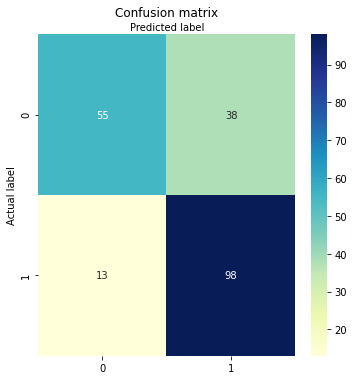

In [ ]:
class_names=[0,1] # name  of classes
fig, ax = plt.subplots()
tick_marks = np.arange(len(class_names))
plt.xticks(tick_marks, class_names)
plt.yticks(tick_marks, class_names)
# create heatmap
sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
ax.xaxis.set_label_position("top")
plt.tight_layout()
plt.title('Confusion matrix', y=1.1)
plt.ylabel('Actual label')
plt.xlabel('Predicted label')

In [ ]:
y_pred_proba = logreg.predict_proba(X_test)[::,1]
fpr, tpr, _ = metrics.roc_curve(y_test,  y_pred_proba)
auc = metrics.roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.show()

ValueError: ignored

# 7. Topic analysis and sentiment

## 7.1. Preprocess text

In [ ]:
df_text = df_full[['incredere_sist_fiscal', 'nemultumiri_sist_fiscal', 'schimbari_sist_fiscal', 'ce_ofera_sistemul', 'motivare_incredere_sist_fiscal']]

In [ ]:
ro_stopwords = set(stopwords.words('romanian'))
decoded_stopwords = [unidecode.unidecode(word) for word in ro_stopwords] + ['a-si', 'l', 's', 'sa-s', 'intr-o', 'as', 'as-i', 'le-as']
stemmer = SnowballStemmer(language="romanian")
punctuation_signs= [c for c in string.punctuation] + ['``', "''", '...', '..']

# Clean the text
def clean_text(raw_string):
  # replace new line
  cleaned_string = re.sub('\n', ' ', raw_string)
  # remove emoji
  emoji_pattern = re.compile("["
                              u"\U0001F600-\U0001F64F"  # emoticons
                              u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                              u"\U0001F680-\U0001F6FF"  # transport & map symbols
                              u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                              u"\U00002702-\U000027B0"
                              u"\U000024C2-\U0001F251"
                              # "^a-zA-Z"
                              "]+", flags=re.UNICODE)
  cleaned_string = emoji_pattern.sub(r'', cleaned_string)
  # lower all letters
  cleaned_string = cleaned_string.lower()
  # decode special characters
  cleaned_string = unidecode.unidecode(cleaned_string)
  # remove special characters and numbers
  cleaned_string = re.sub("-|.|;|:", " ", cleaned_string, re.I)
  cleaned_string = re.sub("[^a-z ]", " ", cleaned_string, re.I)
  # remove multiple spaces
  cleaned_string = re.sub(' +', ' ', cleaned_string)
  # tokenize strings
  cleaned_string = nltk.word_tokenize(cleaned_string)
  # remove stopwords and punctuation signs
  cleaned_string = [word.strip() for word in cleaned_string if word not in decoded_stopwords and len(word)>2]
  cleaned_string = [word.strip() for word in cleaned_string if word not in punctuation_signs]
  # stem the words - reduce words to stema
  cleaned_string = [stemmer.stem(word.strip()) for word in cleaned_string if word]
  # cleaned_string = ' '.join(cleaned_string)
  # cleaned_string = re.sub(' +', ' ', cleaned_string)

  return cleaned_string

In [ ]:
# Create three new columns with the prepreocesed text
for column in ['nemultumiri_sist_fiscal', 'schimbari_sist_fiscal', 'ce_ofera_sistemul']:
  df_text[f'{column}_prep'] = df_text[column].apply(lambda x: clean_text(x))

In [ ]:
# Create a column with all preprocessed texts
df_text['all_responses_prep'] =  df_text['nemultumiri_sist_fiscal_prep'] + df_text['schimbari_sist_fiscal_prep'] + df_text['ce_ofera_sistemul_prep']
df_text['all_responses_word_count'] = df_text['all_responses_prep'].apply(len)
df_text.head(2)

,incredere_sist_fiscal,nemultumiri_sist_fiscal,schimbari_sist_fiscal,ce_ofera_sistemul,all_responses,nemultumiri_sist_fiscal_prep,schimbari_sist_fiscal_prep,ce_ofera_sistemul_prep,all_responses_prep,all_responses_word_count
0,1,- injustetea sociala\n- impunerea excesiva\n- ...,as incerca sa-l orientez spre cetatean.,- crestere a nivelului de trai in mod semi-efi...,- injustetea sociala\n- impunerea excesiva\n- ...,"[injustet, social, impun, exces, privileg, rez...","[incerc, orient, cetatean]","[crest, nivel, tra, sem, eficient, sustin, ins...","[injustet, social, impun, exces, privileg, rez...",25
1,1,Ineficiența utilizării sumelor de bani strânse...,Aș crea un mediu de afacere stabil.,Birocrație excesivă.,Ineficiența utilizării sumelor de bani strânse...,"[eficient, utilizar, sum, ban, stran, tax, impoz]","[cre, mediu, afac, stabil]","[rocrat, exces]","[eficient, utilizar, sum, ban, stran, tax, imp...",13


## 7.2. Bivariate analysis between text and the variable of interest (incredere in sistemul fiscal)

In [ ]:
# Create a dataframe with words (uni-grams) and value for the trust variable (dependent)
words_trust = df_text[['incredere_sist_fiscal','all_responses_prep']].explode('all_responses_prep').reset_index(drop=True)
words_trust.shape
# words_trust.to_csv(os.path.join(path, 'data', 'uni-grams.csv'), index=False)

(15009, 2)

In [ ]:
df_responses_trust = df_text[['incredere_sist_fiscal', 'all_responses_prep']] # get a subsample of the text dataframe with the variables of interest
df_responses_trust = df_responses_trust[df_responses_trust.astype(str)['all_responses_prep'] != '[]'] # remove all empty [] values
df_responses_trust = df_responses_trust[~df_responses_trust.all_responses.str.len().eq(1)] # remove all rows that contain only one word

df_responses_trust.shape

(777, 2)

In [ ]:
def create_bigrams(row):
  ngrams = nltk.ngrams(row, 2)
  ngram_list = []
  for item in ngrams:
    ngram_list.append(item[0]+' '+item[1])
  return ngram_list
df_responses_trust['bi-grams'] = df_responses_trust['all_responses'].apply(lambda row: create_bigrams(row))

In [ ]:
bigrams_trust = df_responses_trust[['incredere_sist_fiscal','bi-grams']].explode('bi-grams').reset_index(drop=True)
bigrams_trust.shape
# bigrams_trust.to_csv(os.path.join(path, 'data', 'bi-grams.csv'), index=False)

(14196, 2)

In [ ]:
# # Create bi-grams and tri-grams for each response set
def create_trigrams(row):
  ngrams = nltk.ngrams(row, 3)
  ngram_list = []
  for item in ngrams:
    ngram_list.append(item[0]+' '+item[1] + ' '+ item[2])
  return ngram_list
df_responses_trust['tri-grams'] = df_responses_trust['all_responses'].apply(lambda row: create_trigrams(row))
df_responses_trust.head(2)

,incredere_sist_fiscal,all_responses,bi-grams,tri-grams
0,1,"[injustet, social, impun, exces, privileg, rez...","[injustet social, social impun, impun exces, e...","[injustet social impun, social impun exces, im..."
1,1,"[eficient, utilizar, sum, ban, stran, tax, imp...","[eficient utilizar, utilizar sum, sum ban, ban...","[eficient utilizar sum, utilizar sum ban, sum ..."


In [ ]:
trigrams_trust = df_responses_trust[['incredere_sist_fiscal','tri-grams']].explode('tri-grams').reset_index(drop=True)
trigrams_trust.shape
# trigrams_trust.to_csv(os.path.join(path, 'data', 'tri-grams.csv'), index=False)

(13433, 2)

In [ ]:
trigrams_trust.groupby(by='incredere_sist_fiscal').count()

,tri-grams
incredere_sist_fiscal,
0,5913
1,7506


In [ ]:
bigrams_trust.groupby(by='incredere_sist_fiscal').count()

,bi-grams
incredere_sist_fiscal,
0,6231
1,7965


In [ ]:
words_trust.groupby(by='incredere_sist_fiscal').count()

,all_responses
incredere_sist_fiscal,
0,6553
1,8429


## 7.3. Univariate visualization for the text

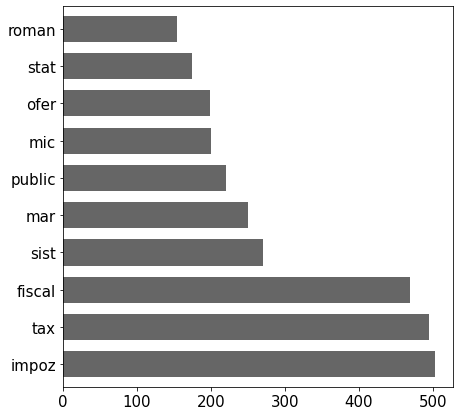

In [ ]:
# Top 10 most frequent words
words_trust['all_responses'].value_counts()[:10].plot(kind='barh', figsize=(7, 7), color='#666666', zorder=2, width=0.7, fontsize=15)
words_trust.to_csv(os.path.join(path, 'data', 'words_trust.csv'), index=False) # save the dataset for more visualization purposes

In [ ]:
words = df_text['all_responses'].to_list()
words_l = [item for sublist in words for item in sublist]

In [ ]:
# Most frequent bi-grams and tri-grams
bigrams_series = (pd.Series(nltk.ngrams(words_l, 2)).value_counts())[:20]
trigrams_series = (pd.Series(nltk.ngrams(words_l, 3)).value_counts())[:20]

Text(0.5, 1.0, '20 Most Frequently Occuring Bigrams')

Text(0, 0.5, 'Bigram')

Text(0.5, 0, 'Frequency')

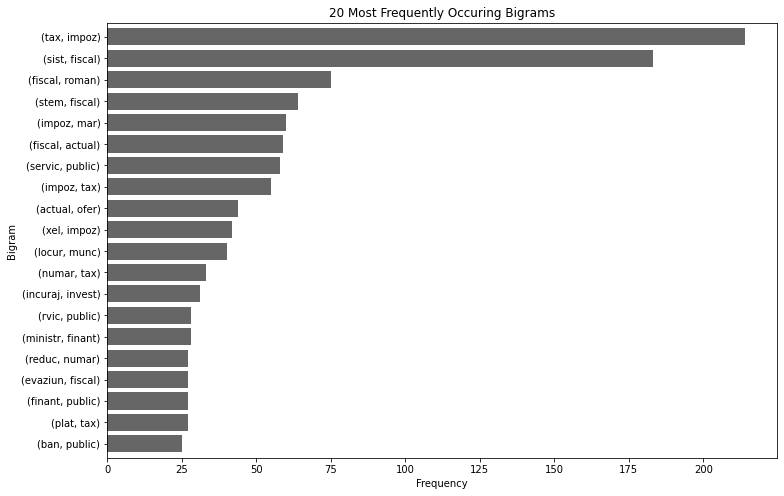

In [ ]:
bigrams_series.sort_values().plot.barh(color='#666666', width=.8, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams')
plt.ylabel('Bigram')
plt.xlabel('Frequency')

Text(0.5, 1.0, '20 Most Frequently Occuring Bigrams')

Text(0, 0.5, 'Trigram')

Text(0.5, 0, 'Frequency')

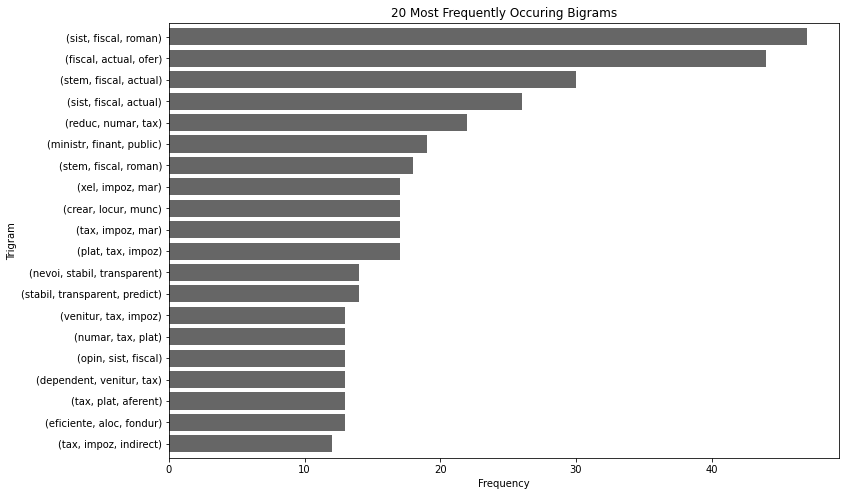

In [ ]:
trigrams_series.sort_values().plot.barh(color='#666666', width=.8, figsize=(12, 8))
plt.title('20 Most Frequently Occuring Bigrams')
plt.ylabel('Trigram')
plt.xlabel('Frequency')

## 7.4. Analysis of the words that make a difference between the two groups: 0 and 1

In [ ]:
# Let's try to see which are the words which are specific to only one category of trust
all_responses_dict = words_trust[['incredere_sist_fiscal', 'all_responses']].to_dict()
# all_responses_dict

In [ ]:
words_trust.head()

,incredere_sist_fiscal,all_responses
0,1,injustet
1,1,social
2,1,impun
3,1,exces
4,1,privileg


In [ ]:
trigrams_trust.head()

,incredere_sist_fiscal,tri-grams
0,1,injustet social impun
1,1,social impun exces
2,1,impun exces privileg
3,1,exces privileg rezerv
4,1,privileg rezerv stat


In [ ]:
bigrams_trust.head()

,incredere_sist_fiscal,bi-grams
0,1,injustet social
1,1,social impun
2,1,impun exces
3,1,exces privileg
4,1,privileg rezerv


In [ ]:
df_responses_trust.head()

,incredere_sist_fiscal,all_responses,bi-grams,tri-grams
0,1,"[injustet, social, impun, exces, privileg, rez...","[injustet social, social impun, impun exces, e...","[injustet social impun, social impun exces, im..."
1,1,"[eficient, utilizar, sum, ban, stran, tax, imp...","[eficient utilizar, utilizar sum, sum ban, ban...","[eficient utilizar sum, utilizar sum ban, sum ..."
2,0,"[ganiz, probabil, deficitar, circuit, lung, pa...","[ganiz probabil, probabil deficitar, deficitar...","[ganiz probabil deficitar, probabil deficitar ..."
3,1,"[incred, sist, stiu, schimb, privint, stiu]","[incred sist, sist stiu, stiu schimb, schimb p...","[incred sist stiu, sist stiu schimb, stiu schi..."
4,0,"[scalitat, roman, plin, contradict, mplific, l...","[scalitat roman, roman plin, plin contradict, ...","[scalitat roman plin, roman plin contradict, p..."


## 7.5. Topic analysis for each answer (selected no of topics 2)

In [ ]:
# Create the dictionary
for column in ['nemultumiri_sist_fiscal_prep', 'schimbari_sist_fiscal_prep', 'ce_ofera_sistemul_prep']:
  responses_list = df_text[column].to_list()
  dictionary_responses = Dictionary(responses_list)
  responses_bow = [dictionary_responses.doc2bow(response) for response in responses_list]
  # Build the LDA model
  ldamodel = LdaModel(responses_bow, 
                      num_topics = 2,
                      id2word = dictionary_responses,
                      passes  = 15,
                      alpha='symmetric',
                      iterations=100,
                      random_state = 5)
  # pprint(ldamodel.print_topics())
  # pyLDAvis.enable_notebook()
  # # feed the LDA model into the pyLDAvis instance
  # lda_viz = gensimvis.prepare(ldamodel, corpus, dictionary)
  lda_display = gensimvis.prepare(ldamodel,
                                responses_bow,
                                dictionary_responses,
                                sort_topics=True)
  pyLDAvis.display(lda_display)

## 7.2. Topic analysis vs. trust

In [ ]:
for trust in [0, 1]:  
  responses_list = df_text['all_responses'].loc[df_text['incredere_sist_fiscal'] == trust].to_list()
  dictionary_responses = Dictionary(responses_list)
  responses_bow = [dictionary_responses.doc2bow(response) for response in responses_list]
  # Build the LDA model
  ldamodel = LdaModel(responses_bow, 
                      num_topics = 3,
                      id2word = dictionary_responses,
                      passes  = 15,
                      alpha='symmetric',
                      iterations=100,
                      random_state = 5)
  # pprint(ldamodel.print_topics())
  # pyLDAvis.enable_notebook()
  # # feed the LDA model into the pyLDAvis instance
  # lda_viz = gensimvis.prepare(ldamodel, corpus, dictionary)
  lda_display = gensimvis.prepare(ldamodel,
                                responses_bow,
                                dictionary_responses,
                                sort_topics=True)
  pyLDAvis.display(lda_display)

## 7.3. Topic analysis of all responses (disregarding any categorization)

In [ ]:
responses_list = df_text['all_responses'].to_list()
dictionary_responses = Dictionary(responses_list)
responses_bow = [dictionary_responses.doc2bow(response) for response in responses_list]
# Build the LDA model
ldamodel = LdaModel(responses_bow, 
                  num_topics = 3,
                  id2word = dictionary_responses,
                  passes  = 15,
                  alpha='symmetric',
                  iterations=100,
                  random_state = 5)
lda_display = gensimvis.prepare(ldamodel,
                            responses_bow,
                            dictionary_responses,
                            sort_topics=True)
pyLDAvis.display(lda_display)

# 8. Model text vs dependent variable

In [ ]:
df_text['all_responses'] =  df_text['nemultumiri_sist_fiscal'] + ' ' + df_text['schimbari_sist_fiscal']+ ' ' + df_text['ce_ofera_sistemul']
df_text = df_text.drop(columns=['motivare_incredere_sist_fiscal'])
df_text.head(2)

,incredere_sist_fiscal,nemultumiri_sist_fiscal,schimbari_sist_fiscal,ce_ofera_sistemul,all_responses,nemultumiri_sist_fiscal_prep,schimbari_sist_fiscal_prep,ce_ofera_sistemul_prep,all_responses_prep,all_responses_word_count
0,1,- injustetea sociala\n- impunerea excesiva\n- ...,as incerca sa-l orientez spre cetatean.,- crestere a nivelului de trai in mod semi-efi...,- injustetea sociala\n- impunerea excesiva\n- ...,"[injustet, social, impun, exces, privileg, rez...","[incerc, orient, cetatean]","[crest, nivel, tra, sem, eficient, sustin, ins...","[injustet, social, impun, exces, privileg, rez...",25
1,1,Ineficiența utilizării sumelor de bani strânse...,Aș crea un mediu de afacere stabil.,Birocrație excesivă.,Ineficiența utilizării sumelor de bani strânse...,"[eficient, utilizar, sum, ban, stran, tax, impoz]","[cre, mediu, afac, stabil]","[rocrat, exces]","[eficient, utilizar, sum, ban, stran, tax, imp...",13


In [ ]:
df_text.describe() # after tokenizing and cleaning the text for stopwords and punctuation signs, the maximum number of words is 0 with a maximum of 182
# bert's maxlen could be set to 300, in this case, to make sure we include as much info as possible in training

,incredere_sist_fiscal,all_responses_word_count
count,813.000000,813.000000
mean,0.589176,18.428044
std,0.492286,20.791039
min,0.000000,0.000000
25%,0.000000,6.000000
50%,1.000000,12.000000
75%,1.000000,23.000000
max,1.000000,182.000000


In [ ]:
data_train, data_test, labels_train, labels_test = train_test_split(
    df_text[['all_responses', 'incredere_sist_fiscal']], # to keep both texts and labels, necessary for the ktrain lib texts_from_df
    df_text['incredere_sist_fiscal'],
    train_size = 0.8,
    random_state = 42
)
print(data_train.shape)
print(data_test.shape)
data_train.head(2)

(650, 2)
(163, 2)


,all_responses,incredere_sist_fiscal
239,Se modifică destul de des. Aș face un sistem f...,1
447,"Faptul că nu este stabil, se modifică prea des...",0


In [ ]:
(X_train, y_train), (X_test, y_test), preprocess = text.texts_from_df(
    train_df=data_train,
    text_column='all_responses', # no need to run on preprocessed text, as already has a predefined preprocessing function in place
    label_columns='incredere_sist_fiscal',
    val_df=data_test,
    maxlen=300, # max allowed is 512 per document words, which is the maximum for bert
    preprocess_mode='bert')

['not_incredere_sist_fiscal', 'incredere_sist_fiscal']
     not_incredere_sist_fiscal  incredere_sist_fiscal
239                        0.0                    1.0
447                        1.0                    0.0
335                        1.0                    0.0
599                        1.0                    0.0
534                        1.0                    0.0
['not_incredere_sist_fiscal', 'incredere_sist_fiscal']
     not_incredere_sist_fiscal  incredere_sist_fiscal
247                        1.0                    0.0
590                        0.0                    1.0
227                        1.0                    0.0
291                        0.0                    1.0
540                        0.0                    1.0
downloading pretrained BERT model (multi_cased_L-12_H-768_A-12.zip)...
[██████████████████████████████████████████████████]
extracting pretrained BERT model...
done.

cleanup downloaded zip...
done.

preprocessing train...
language: ro


Is Multi-Label? False
preprocessing test...
language: ro


In [ ]:
print(X_train[0].shape)
print(X_train[1].shape)

(650, 300)
(650, 300)


In [ ]:
# Create BERT model
model_bert = text.text_classifier(
  name='bert', # ktrain selects BERT model automatically based on the language detected/ TODO try with distilbert if multilanguage ok
  train_data=(X_train, y_train),
  preproc=preprocess,
)

Is Multi-Label? False
maxlen is 300
done.


In [ ]:
# Find the best lerning rate
learner = ktrain.get_learner(model=model_bert,
                             batch_size=6,
                             train_data=(X_train, y_train),
                             val_data=(X_test, y_test))

In [ ]:
learner.lr_find() #takes a very long time to find the learning rate, but it's good to be used; not possible to run, resources exhausted

simulating training for different learning rates... this may take a few moments...
Epoch 1/1024
109/109 [==============================] - 2502s 23s/step - loss: 0.7441 - accuracy: 0.4653
Epoch 2/1024
109/109 [==============================] - 2425s 22s/step - loss: 0.6946 - accuracy: 0.5466
Epoch 3/1024
109/109 [==============================] - 2416s 22s/step - loss: 0.6970 - accuracy: 0.5316
Epoch 4/1024
109/109 [==============================] - 2400s 22s/step - loss: 0.6807 - accuracy: 0.5768
Epoch 5/1024
109/109 [==============================] - 2426s 22s/step - loss: 0.6480 - accuracy: 0.6252
Epoch 6/1024
109/109 [==============================] - 2512s 23s/step - loss: 0.6277 - accuracy: 0.6639
Epoch 7/1024
109/109 [==============================] - 2514s 23s/step - loss: 0.7231 - accuracy: 0.5203
Epoch 8/1024
  6/109 [>.............................] - ETA: 39:00 - loss: 0.7132 - accuracy: 0.7074

In [ ]:
# Train model
learner.fit_onecycle(lr=3e-5, epochs=100) # trainig will go through the dataset 5 times

In [ ]:
# Missclassified
learner.view_top_losses(
    n=1,
    preproc=preprocess)

In [ ]:
# Check results
learner.validate()

In [ ]:
# Save predictor to disk
predictor.save(os.path.join(path, 'data', "bert_predictor"))

In [ ]:
# Balance the dataset
positive_texts = df_text[df_text.incredere_sist_fiscal==1]
negative_texts = df_text[df_text.incredere_sist_fiscal==0]
df_text_balanced = pd.concat([positive_texts.sample(negative_texts.shape[0]), negative_texts], axis=0)

df_text_balanced['incredere_sist_fiscal'].value_counts()

0    334
1    334
Name: incredere_sist_fiscal, dtype: int64

In [ ]:
df_text.head(2)

,incredere_sist_fiscal,nemultumiri_sist_fiscal,schimbari_sist_fiscal,ce_ofera_sistemul,motivare_incredere_sist_fiscal
0,1,- injustetea sociala\n- impunerea excesiva\n- ...,as incerca sa-l orientez spre cetatean.,- crestere a nivelului de trai in mod semi-efi...,Îmi creează sentimentul că plătesc un serviciu...
1,1,Ineficiența utilizării sumelor de bani strânse...,Aș crea un mediu de afacere stabil.,Birocrație excesivă.,Îmi creează sentimentul că plătesc un serviciu...


In [ ]:
df_preproc_balanced['word_count'] = df_preproc_balanced['text_prep'].apply(lambda x: len(x))
df_preproc_balanced.head(2)
df_preproc_balanced.describe() # some stats to determine the maxlen when preprocessing for training

# Dataset on tax perception

In [ ]:
df = df.rename(columns = {'4. Ce rol credeți că joacă veniturile din taxe și impozite pentru bugetul de stat?': 'rol_taxe',
                '8. În opinia dumneavoastră care credeți că vor fi efectele economice produse de reducerea cotei de TVA la toate produsele?': 'efecte_reducere_tva', 
                '14. De ce platim taxe și impozite?': 'de_ce_taxe'})
df = df[['rol_taxe', 'efecte_reducere_tva', 'de_ce_taxe']]

In [ ]:
df.head()

,Aveți încredere în sistemul fiscal?,Ce vă nemulțumește la sistemul fiscal românesc?,Dacă ați fi ministrul finanțelor publice ce ați schimba la sistemul fiscal românesc?,"În opinia dumneavoastră, ce vă oferă sistemul fiscal actual?",Care din următoarele afirmații v-ar motiva să aveți încredere în sistemul fiscal?,Ce părere aveți despre sistemul fiscal actual?,TRANSPARENCY,VALUE FOR MONEY,ECONOMICAL,TRUST,SOCIAL WELFARE,WORK PLACE CREATION,SOCIO-ECONOMIC DEVELOPMENT,STABILITY,PREDICTIBILITY,FIN_INSP,FINES,CLEAR_LAW,FISC_FACIL,SUBV,INVEST_TAX,Q_PUBLIC_SV,TRUST.1,PUBLIC_INV,TRANSP,Unnamed: 25,Unnamed: 26,Unnamed: 27,Unnamed: 28,Unnamed: 29,Unnamed: 30,Unnamed: 31,Unnamed: 32,Unnamed: 33,Unnamed: 34,Unnamed: 35,Unnamed: 36,Unnamed: 37,Unnamed: 38,Unnamed: 39,Unnamed: 40
0,1,- injustetea sociala\n- impunerea excesiva\n- ...,as incerca sa-l orientez spre cetatean.,- crestere a nivelului de trai in mod semi-efi...,Îmi creează sentimentul că plătesc un serviciu...,Foarte slabă,5,4,4,5,4,4,5,5,5,3,4,4,4,3,2,4,5,4,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1,Ineficiența utilizării sumelor de bani strânse...,Aș crea un mediu de afacere stabil.,Birocrație excesivă.,Îmi creează sentimentul că plătesc un serviciu...,Bună,5,4,4,4,4,5,4,5,4,3,4,4,3,4,4,5,5,5,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0,"Organizarea probabil deficitara,\nCircuitul lu...",Din postura mea de acum imi este greu sa dau u...,"Un trai decent, servicii sociale intre mediocr...",Îmi creează sentimentul că plătesc un serviciu...,Neutră,3,5,4,4,4,5,5,4,3,3,3,3,3,5,5,5,5,5,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,1,Nu prea am incredere in sistem.,Nu prea stiu ce as schimba dar as face ceva in...,Nu stiu,Îmi creează sentimentul că plătesc un serviciu...,Bună,4,5,4,5,5,5,5,5,4,2,4,4,3,4,5,5,5,5,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0,Fiscalitatea din Romania e plina de contradictii,Simplificarea legislatiei si a raportarilor fi...,Proceduri complicate....,Îmi creează sentimentul că plătesc un serviciu...,Foarte slabă,5,4,4,5,4,5,5,4,3,2,3,4,3,5,5,5,4,5,5,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [ ]:
df.groupby('de_ce_taxe').count()

,rol_taxe,efecte_reducere_tva
de_ce_taxe,,
In mare parte pentru ca este obligatoriu,1,1
Este oblogatie,1,1
"In mare parte pentru ca e obligatoriu, dar totusi aceste taxe si impozite sprijina intr-o oarecare masura echilibrul tari.",1,1
PENTRU CA ALTFEL ECONOMIA NATIONALA AR FI IN COLAPS.,1,1
Pentru ca din ele AR trebui sa se finanteze serviciile publice,1,1
Pentru ca din ele ar trebui sa se finanteze serviciile publice,1,1
Pentru ca e obligatoriu si de asemenea pentru ca din ele se finanteaza servicii publice.,1,1
Pentru ca trebuie.,1,1
Pentru că din ele se finanțează serviciile publice,473,474


In [ ]:
df.groupby('rol_taxe').count()

,efecte_reducere_tva,de_ce_taxe
rol_taxe,,
"Ajută la reabilitarea spitalelor, școlilor, furnizarea serviciilor publice, etc.",22,22
"Ajută la reabilitarea spitalelor, școlilor, furnizarea serviciilor publice, etc., Susțin măsurile de protecție socială",2,2
"Ajută la reabilitarea spitalelor, școlilor, furnizarea serviciilor publice, etc., Susțin un sistem administrativ statal eficient",5,5
"Ajută la reabilitarea spitalelor, școlilor, furnizarea serviciilor publice, etc., Susțin un sistem administrativ statal eficient, Susțin măsurile de protecție socială",2,2
"Bani mai mulți pentru pensii speciale,ajutoare sociale pentru putori,si condiții pentru criminali din pușcarii.Prea puțin pentru infrastructura,spitale,scoli!!",1,1
...,...,...
"Susțin dezvoltarea infrastructurii, Susțin un sistem administrativ statal eficient, Susțin măsurile de protecție socială",3,3
Susțin măsurile de protecție socială,6,6
"Susțin măsurile de protecție socială, sustin un sistem administrativ statal ineficient",1,1


In [ ]:
df.groupby('efecte_reducere_tva').count()

,rol_taxe,de_ce_taxe
efecte_reducere_tva,,
Ieftiniirea painii,1,1
"In momentul de fata, scaderea cotei TVA este ca o sabie cu 2 tăișuri. Pe de o parte consumul ar fi stimulat(in cazul in care preturile scad, ceea ce nu este obligatoriu) iar pe de alta parte, inlocuirea veniturilor din impozite se va compensa cu marirea altor impozite.",1,1
"Normal ar fi, scad prețurile și vom putea cumpăra mai mult, dar acest lucru nu înseamnă ca prețurile vor scădea. Sau chiar dacă vor scădea, un alt lucru (impozit, taxă) va crește pentru a compensa pierderea din TVA.",1,1
"Nu cred ca va exista un efect major anume, eventual cresterea altor taxe sau impozite.",1,1
Scad prețurile și vom putea cumpăra mai mult,34,34
"Scad prețurile și vom putea cumpăra mai mult, Scăderea TVA-ului nu va fi urmată neaparat de scăderea prețurilor la bunurile de consum",3,3
Scad veniturile bugetare și vor crește alte impozite sau taxe,117,117
"Scad veniturile bugetare și vor crește alte impozite sau taxe, Scad prețurile și vom putea cumpăra mai mult",2,2
"Scad veniturile bugetare și vor crește alte impozite sau taxe, Scăderea TVA-ului nu va fi urmată neaparat de scăderea prețurilor la bunurile de consum",71,71
